In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
#importing the file to read
data = pd.read_csv(r'C:\Users\ASUS\Desktop\python\exams.csv')
copied_data = data.copy()


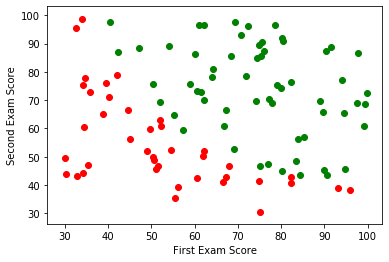

In [14]:
#classifying the data into admitted and not admitted student based on exam results
e1a = data[data['admitted']==1]['exam_1']
e2a = data[data['admitted']==1]['exam_2']
e1na = data[data['admitted']==0]['exam_1']
e2na = data[data['admitted']==0]['exam_2']

#scattering the graph of admitted and not admitted students
plt.xlabel("First Exam Score")
plt.ylabel("Second Exam Score")
plt.scatter(e1a, e2a, color="green")
plt.scatter(e1na, e2na, color="red")

In [15]:
#normalization of data (minmax normalization)
data['exam_1'] = (data['exam_1']-data['exam_1'].min())/(data['exam_1'].max()-data['exam_1'].min())
data['exam_2'] = (data['exam_2']-data['exam_2'].min())/(data['exam_2'].max()-data['exam_2'].min())

x = data[['exam_1', 'exam_2']].values
y = data['admitted'].values

#logistic sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))
#cost function of logistic regression
def costFunction(h, y):
    return (-y * np.log(h)-(1-y)*np.log(1-h)).mean()
#probability prediction 
def predProb (x, theta):
    return sigmoid(np.dot(x, theta))
#prediction function
def pred(x, theta, threshold = 0.5):
    prob = predProb(x, theta)
    prob[prob>=0.5] = 1
    prob[prob<0.5] = 0
    return prob

intercept = np.ones((x.shape[0], 1))

x = np.concatenate((intercept, x), axis = 1)
theta = np.zeros(x.shape[1])
learning_rate = 0.01
numOfits = 100000

#gradient descent
cost_history = []
for i in range(numOfits):
    z = np.dot(x, theta)
    h = sigmoid(z)
    gradient = np.dot(x.T, (h-y))/ y.size
    theta -= learning_rate*gradient
    if i %1000 == 0: print(costFunction(h, y))
    cost_history.append(costFunction(h, y))

0.6931471805599453
0.5908778825379103
0.5448305466419671
0.5074938468946265
0.47688781019259757
0.45150408980588247
0.4301990908090169
0.4121107665725063
0.39658771701610085
0.38313421082464416
0.37136936482059973
0.3609973996820093
0.3517860883426499
0.34355111346656747
0.3361446468624711
0.32944694295395643
0.32336009278123085
0.31780333736092314
0.3127095159807164
0.30802234811863377
0.303694333487735
0.29968511477637505
0.29596018997599843
0.29248989123592667
0.2892485686963154
0.28621393328480765
0.2833665237784718
0.2806892717472795
0.2781671441566069
0.27578684800944137
0.2735365848755757
0.2714058457858185
0.26938523898041555
0.26746634454931095
0.2656415912021355
0.2639041513422584
0.26224785135440043
0.2606670945959111
0.2591567950429646
0.25771231991122356
0.2563294398661752
0.25500428567691524
0.25373331036055785
0.252513256021988
0.25134112472255055
0.2502141528171634
0.24912978828669594
0.24808567066480933
0.2470796132186056
0.24610958709262779
0.24517370716777723
0.24427

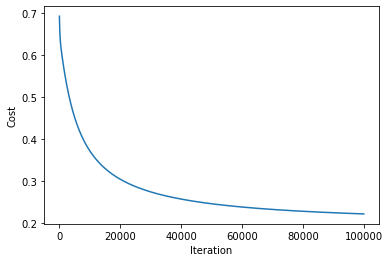

In [16]:
#Cost vs Iteration graph
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.plot(range(len(cost_history)), cost_history)

[0.0, 1.0]
[ 0.93375888 -0.13246154]


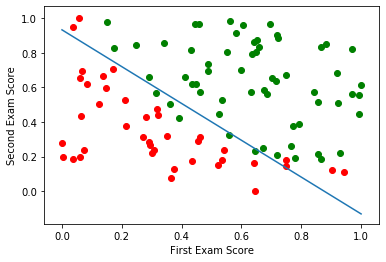

In [17]:
#scattering after data is normalized plus a prediction line is plotted
plt.scatter(data[data['admitted']==1]['exam_1'], data[data['admitted']==1]['exam_2'], color="green")
plt.scatter(data[data['admitted']==0]['exam_1'], data[data['admitted']==0]['exam_2'], color="red")
x_values =  [np.min(data['exam_1']), np.max(data['exam_1'])]
y_values = - (theta[0] + np.dot(theta[1], x_values))/theta[2]
print(x_values)
print(y_values)
plt.xlabel("First Exam Score")
plt.ylabel("Second Exam Score")
plt.plot(x_values, y_values)

In [18]:
#using sklearn library
preds = pred(x, theta)
print('Prediction on train data')
print(preds)
print('Actual values')
print(y)
print('Accuracy')
print(accuracy_score(y, preds))

Prediction on train data
[0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1.]
Actual values
[0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]
Accuracy
0.89


In [19]:
#Testing1
testX_1 = np.array([55, 70])
testY_1 = 1

#Testing2
testX_2 = np.array ([40, 60])
testY_2 = 0

testX_1 = (testX_1 - copied_data['exam_1'].min())/(copied_data['exam_1'].max() - copied_data['exam_1'].min())
testX_1 = np.insert(testX_1, 0, 1.0)

testX_2 = (testX_2 - copied_data['exam_1'].min())/(copied_data['exam_1'].max() - copied_data['exam_1'].min())
testX_2 = np.insert(testX_2, 0, 1.0)


print('Test 1 prediction:')
print(predProb(testX_1, theta))
print('Test 2 prediction:')
print(predProb(testX_2, theta))

Test 1 prediction:
0.5434423607787652
Test 2 prediction:
0.043449992130119644
